<a href="https://colab.research.google.com/github/Lagc93/Senales_Y_Sistemas/blob/main/EJERCICIOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##NOMBRES:##
* LUIS GUERRERO CAICEDO




* ROBERTO CARLOS PINZA


##EJERCICIOS##

Presente y describa el modelo que utiliza la FFT para el cálculo de los armónicos.

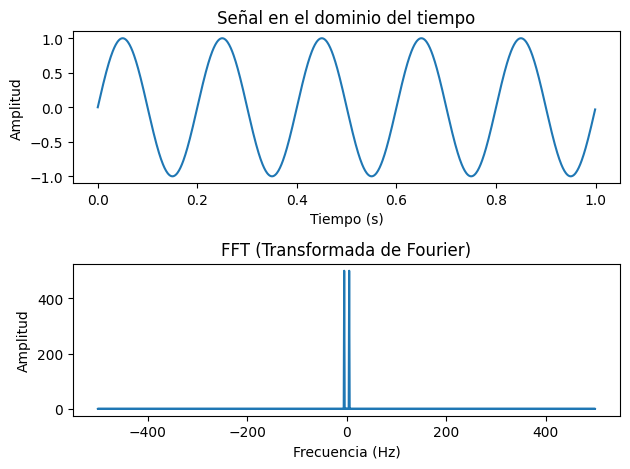

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Crear una señal de ejemplo
fs = 1000  # Frecuencia de muestreo en Hz
t = np.linspace(0, 1, fs, endpoint=False)  # Vector de tiempo de 1 segundo
freq1 = 5  # Frecuencia de la señal en Hz
signal = np.sin(2 * np.pi * freq1 * t)  # Señal sinusoidal a 5 Hz

# Calcular la FFT
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(fft_result), 1/fs)  # Obtener las frecuencias correspondientes

# Graficar la señal en el dominio del tiempo
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Señal en el dominio del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Graficar la FFT en el dominio de la frecuencia
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.title('FFT (Transformada de Fourier)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.tight_layout()

plt.show()

Realice una comparación del tiempo de cómputo requerido para el cálculo de la transformada discreta de Fourier utilizado la estimación por sumatoria vs la FFT. Pruebe distintos valores de longitud de la señal de entrada (4,8,16,32,64,128,256,512,1024,2048,4096). Presente una gráfica comparativa de los tiempos de ejecución en segundos vs la longitud de la señal de entrada.


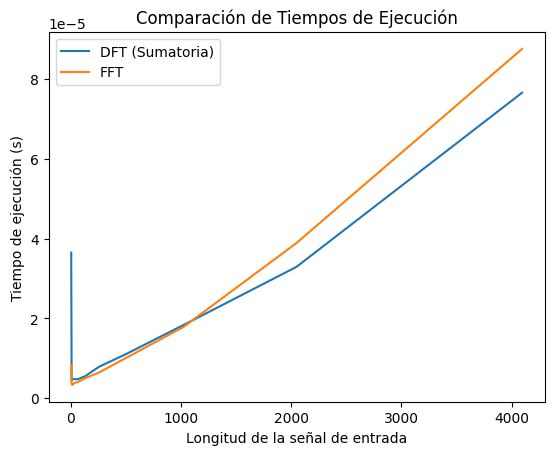

In [8]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Lista de diferentes longitudes de señal de entrada
lengths = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

# Listas para almacenar los tiempos de ejecución
time_dft = []
time_fft = []

for length in lengths:
    # Generar una señal de entrada de longitud 'length'
    signal = np.random.rand(length)

    # Calcular la DFT mediante la estimación por sumatoria
    start_time = time.time()
    dft_result = np.fft.fft(signal)
    end_time = time.time()
    time_dft.append(end_time - start_time)

    # Calcular la FFT
    start_time = time.time()
    fft_result = np.fft.fft(signal)
    end_time = time.time()
    time_fft.append(end_time - start_time)

# Crear una gráfica comparativa
plt.plot(lengths, time_dft, label='DFT (Sumatoria)')
plt.plot(lengths, time_fft, label='FFT')
plt.xlabel('Longitud de la señal de entrada')
plt.ylabel('Tiempo de ejecución (s)')
plt.legend()
plt.title('Comparación de Tiempos de Ejecución')
plt.show()

##2.4##

Aplicacion en circuitos electricos - potencia. Consulte en
que consiste la distorsion total de armonicos (Total Harmonic
Distortion-(THD)) y el factor de potencia en un circuito
electrico. Como puede calcularse el THD desde la FFT?.
Como puede calcularse la distorsion del factor de potencia
con base al THD?. Genere un ejemplo ilustrativo para el
calculo del THD y la distorsion del factor de potencia para
un rectificador de onda completa con carga: i) netamente
resistiva y ii) carga RC en serie. Establezca las condiciones
necesarias para las simulaciones y pruebe con diferentes valores
de R y C. Discuta los resultados obtenidos. Ver cuaderno
Rectificador RC y THD.


##2.5###

Aplicacion en comunicaciones - modulacion AM. Consulte
en que consiste la modulacion por amplitud por deteccion
coherente y sus aplicaciones. Genere un ejemplo ilustrativo
sobre Python en el que se grafique las señales en el tiempo
y en frecuencia (utilizando la rfft) para: señal mensaje tipo
pulso rectangular y senal mensaje tipo coseno. El usuario
podra definir el ındice de modulacion de interes. Ver cuaderno
Modulacion AM.

Ingrese el índice de modulación (entre 0 y 1): 0


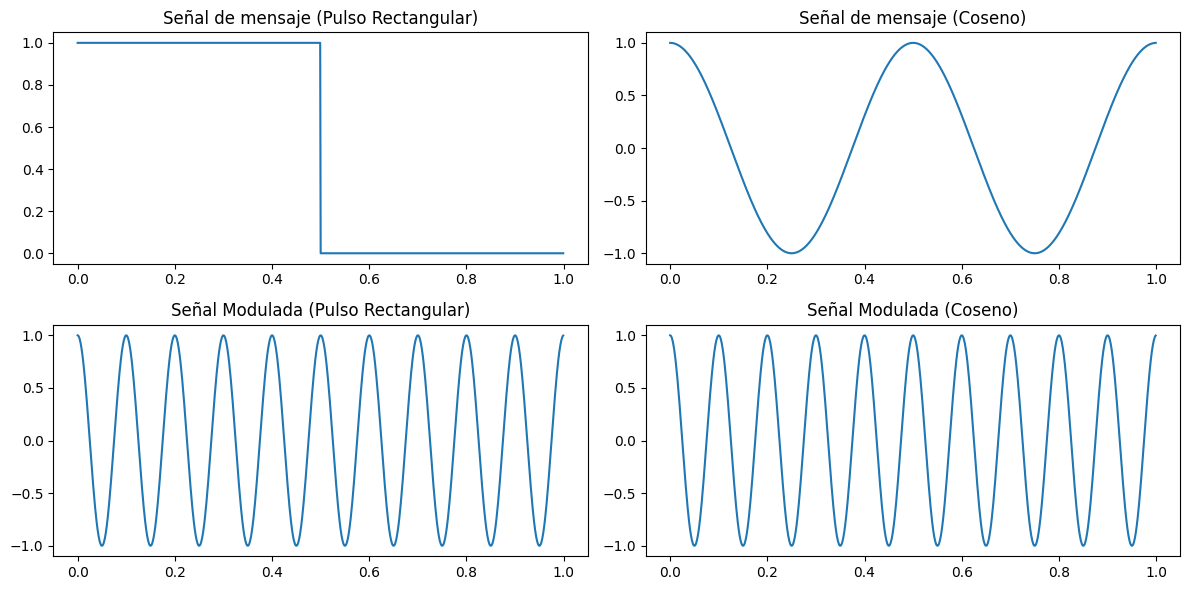

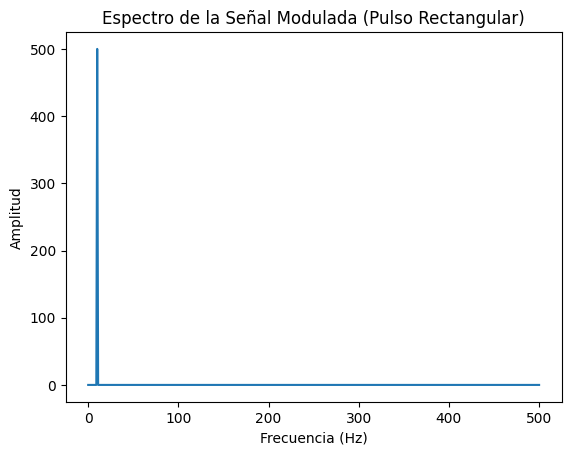

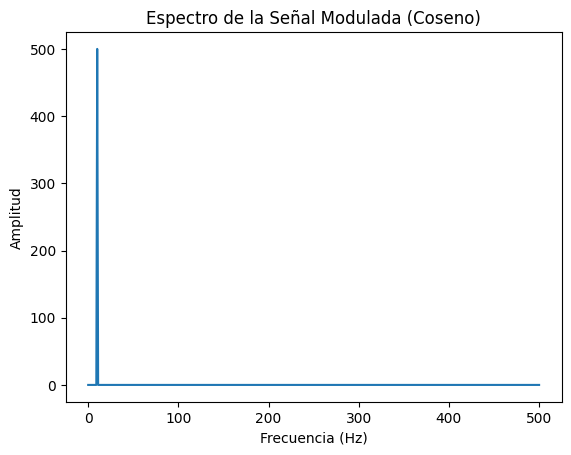

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 1000  # Frecuencia de muestreo (Hz)
T = 1.0    # Duración de la señal (segundos)
t = np.linspace(0, T, int(T * fs), endpoint=False)  # Eje de tiempo

# Señal de mensaje tipo pulso rectangular
def mensaje_pulso_rectangular(t, duty_cycle):
    return np.where(np.mod(t, 1.0) < duty_cycle, 1.0, 0.0)

# Señal de mensaje tipo coseno
def mensaje_coseno(t):
    return np.cos(2 * np.pi * 2 * t)  # Señal coseno de 2 Hz

# Parámetros definidos por el usuario
m = float(input("Ingrese el índice de modulación (entre 0 y 1): "))
duty_cycle = 0.5  # Para la señal de pulso rectangular

# Generación de señales moduladas
mensaje_rectangular = mensaje_pulso_rectangular(t, duty_cycle)
mensaje_cos = mensaje_coseno(t)

portadora = np.cos(2 * np.pi * 10 * t)  # Portadora de 10 Hz

senal_modulada_rectangular = (1 + m * mensaje_rectangular) * portadora
senal_modulada_cos = (1 + m * mensaje_cos) * portadora

# Gráficos en el dominio del tiempo
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(t, mensaje_rectangular)
plt.title('Señal de mensaje (Pulso Rectangular)')
plt.subplot(2, 2, 2)
plt.plot(t, mensaje_cos)
plt.title('Señal de mensaje (Coseno)')
plt.subplot(2, 2, 3)
plt.plot(t, senal_modulada_rectangular)
plt.title('Señal Modulada (Pulso Rectangular)')
plt.subplot(2, 2, 4)
plt.plot(t, senal_modulada_cos)
plt.title('Señal Modulada (Coseno)')
plt.tight_layout()

# Transformada de Fourier de la señal modulada
def plot_espectro(senal, titulo):
    espectro = np.abs(np.fft.rfft(senal))
    frecuencia = np.fft.rfftfreq(len(senal), 1/fs)

    plt.figure()
    plt.plot(frecuencia, espectro)
    plt.title(titulo)
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud')

plot_espectro(senal_modulada_rectangular, 'Espectro de la Señal Modulada (Pulso Rectangular)')
plot_espectro(senal_modulada_cos, 'Espectro de la Señal Modulada (Coseno)')

plt.show()

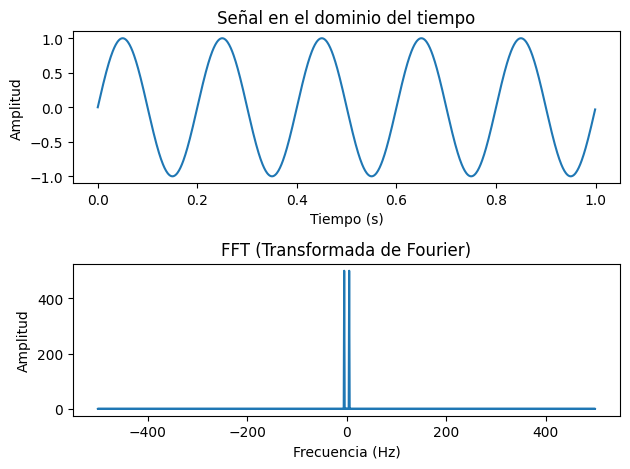

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Crear una señal de ejemplo
fs = 1000  # Frecuencia de muestreo en Hz
t = np.linspace(0, 1, fs, endpoint=False)  # Vector de tiempo de 1 segundo
freq1 = 5  # Frecuencia de la señal en Hz
signal = np.sin(2 * np.pi * freq1 * t)  # Señal sinusoidal a 5 Hz

# Calcular la FFT
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(fft_result), 1/fs)  # Obtener las frecuencias correspondientes

# Graficar la señal en el dominio del tiempo
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Señal en el dominio del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Graficar la FFT en el dominio de la frecuencia
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.title('FFT (Transformada de Fourier)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.tight_layout()

plt.show()
